In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

(X_train,y_train),(X_test,y_test)=cifar10.load_data()
X_train,X_test=X_train/255.0,X_test/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

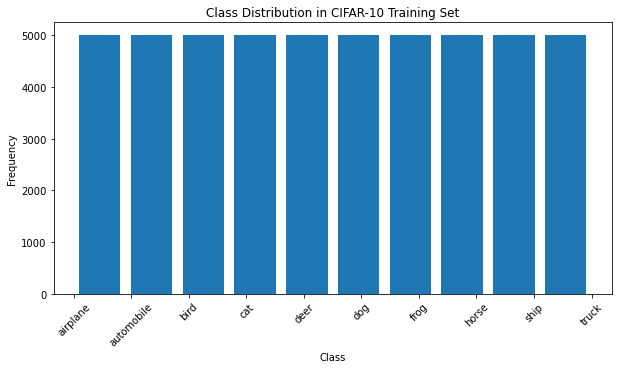

In [6]:
plt.figure(figsize=(10, 5))
plt.hist(y_train, bins=10, rwidth=0.8)
plt.xticks(np.arange(10), class_names, rotation=45)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in CIFAR-10 Training Set')
plt.show()

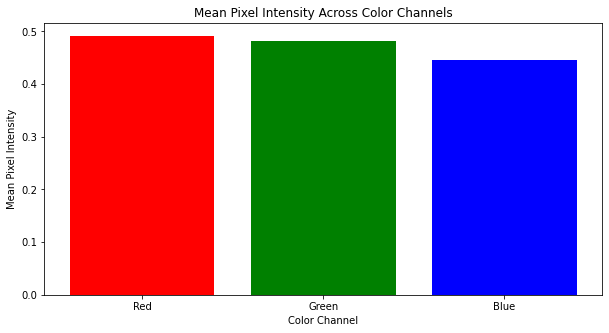

In [8]:
mean_i=np.mean(X_train,axis=(0,1,2))

plt.figure(figsize=(10, 5))
plt.bar(range(3), mean_i, color=['red', 'green', 'blue'])
plt.xticks(range(3), ['Red', 'Green', 'Blue'])
plt.xlabel('Color Channel')
plt.ylabel('Mean Pixel Intensity')
plt.title('Mean Pixel Intensity Across Color Channels')
plt.show()

NameError: name 'Xtrain' is not defined

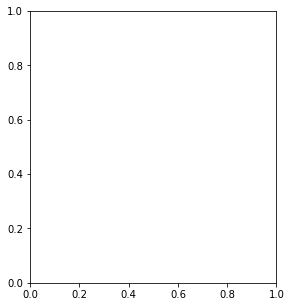

In [13]:
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(Xtrain[i+5])
    plt.title(f'Image {i+1}')
    plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1125/1563 [====================>.........] - ETA: 6s - loss: 1.6460 - accuracy: 0.3899

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the top predicted class for our input image
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Choose an image to apply Grad-CAM
img = X_test[0]
img_array = np.expand_dims(img, axis=0)

# Generate heatmap
last_conv_layer_name = 'conv2d_2'  # Change this to the name of your last conv layer
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

# Superimpose the heatmap on the original image
def superimpose_heatmap(img, heatmap):
    heatmap = np.uint8(255 * heatmap)
    jet = plt.cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * 0.4 + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    return superimposed_img

superimposed_img = superimpose_heatmap(img, heatmap)
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()

NameError: name 'X_test' is not defined